### Calculate sliding average of the current

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [2]:
fCurrent = '/Users/yuntse/data/slarchetto/monitoring/FieldShellCurrent_202206251113.csv'

In [3]:
Current = pd.read_csv(fCurrent, header = None, skiprows = 1, names = ['Time', 'Current'])

In [4]:
Current['Time'] = Current['Time'].transform(lambda t: datetime.strptime(t, '%Y-%m-%d %H:%M:%S.%f'))

In [6]:
# Change the dataframe to series
CurrentSeries = Current['Current'].squeeze()
print( CurrentSeries )
print( type(CurrentSeries) )

0      -198161.0
1      -198156.0
2      -198282.0
3      -198292.0
4      -198214.0
          ...   
1940   -218218.0
1941   -219403.0
1942   -218711.0
1943   -218452.0
1944   -216111.0
Name: Current, Length: 1945, dtype: float64
<class 'pandas.core.series.Series'>


In [7]:
# Number of samples to take the average
windowSize = 20

# Get the window of series
# of observations of specified window size
CurrentWindow = CurrentSeries.rolling( windowSize )
  
# Create a series of moving
# averages of each window
CurrentAveS = CurrentWindow.mean()
# std of each window
CurrentStdS = CurrentWindow.std()

In [8]:
# Convert the series to data frame
CurrentAve = CurrentAveS.to_frame()
CurrentStd = CurrentStdS.to_frame()
# Insert the time stamp and the std to the current average data frame
CurrentAve.insert( 1, 'Time', Current['Time'] )
CurrentAve.insert( 2, 'Std', CurrentStd )
# Add a column of std/average in %
CurrentAve = CurrentAve.assign( Variation = lambda x: x.Std/-x.Current*100. )
# Remove the NaN rows
CurrentAve = CurrentAve.dropna()
print( CurrentAve )

        Current                    Time          Std  Variation
19   -198366.95 2022-06-25 11:16:17.210   254.826355   0.128462
20   -198397.10 2022-06-25 11:16:27.213   264.659245   0.133399
21   -198426.50 2022-06-25 11:16:37.213   269.089009   0.135611
22   -198457.75 2022-06-25 11:16:47.213   287.112462   0.144672
23   -198485.95 2022-06-25 11:16:57.214   297.486218   0.149878
...         ...                     ...          ...        ...
1940 -218899.20 2022-06-25 16:36:28.714  1040.380426   0.475278
1941 -218924.40 2022-06-25 16:36:38.715  1046.461476   0.478001
1942 -218927.30 2022-06-25 16:36:48.715  1045.749900   0.477670
1943 -218977.80 2022-06-25 16:36:58.716   993.321202   0.453617
1944 -218856.00 2022-06-25 16:37:08.718  1180.617635   0.539450

[1926 rows x 4 columns]


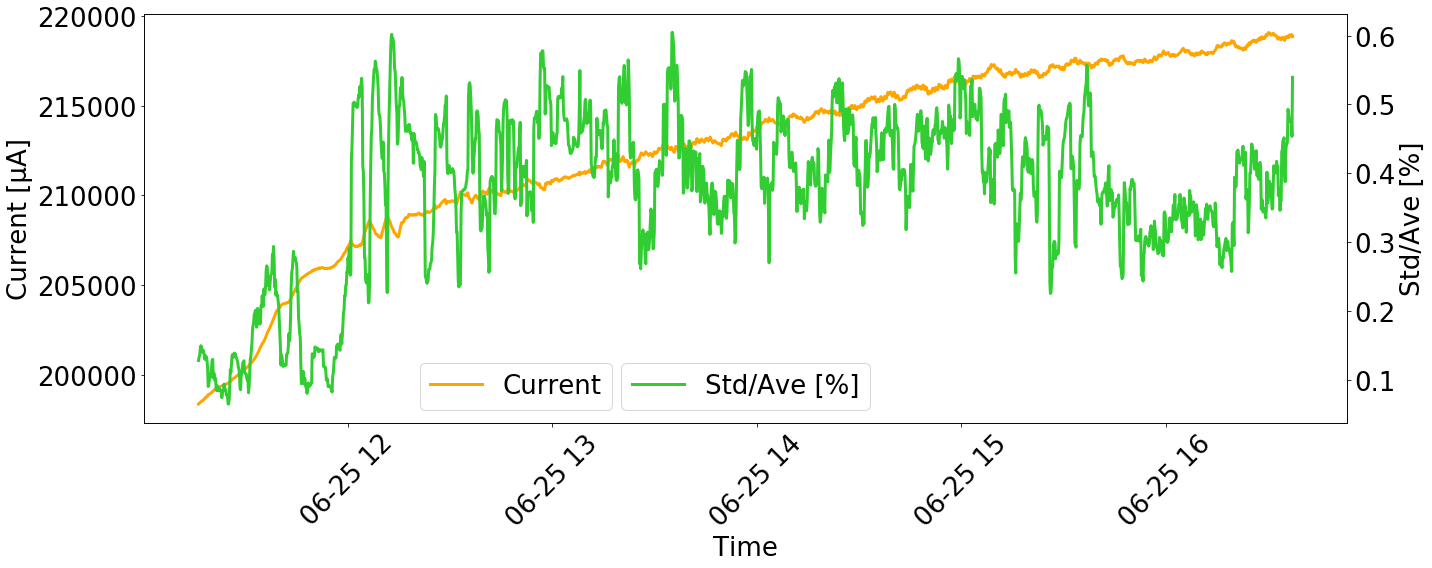

In [9]:
# create figure and axis objects with subplots()
fig1, ax10 = plt.subplots(figsize = (20,8))

# make a plot
ax10.plot( CurrentAve['Time'], -CurrentAve['Current'], label = 'Current', color = 'orange', lw = 3)
# set x-axis label
ax10.set_xlabel('Time', fontsize = 26)
ax10.tick_params(axis = 'x', labelrotation = 45, labelsize = 26)
# set y-axis label
ax10.set_ylabel('Current [µA]', fontsize = 26)
ax10.tick_params(axis = 'y', labelsize = 26)

ax11 = ax10.twinx()
ax11.plot( CurrentAve['Time'], CurrentAve['Variation'], label = 'Std/Ave [%]', color = 'limegreen', lw = 3 )
ax11.set_ylabel('Std/Ave [%]', fontsize = 26)
ax11.tick_params(axis = 'y', labelsize = 26)

ax10.legend(loc = 'lower right', bbox_to_anchor = (0.4, 0), ncol = 1, fontsize = 26)
ax11.legend(loc = 'lower center', ncol = 1, fontsize = 26)

plt.tight_layout()
plt.show()

# save the plot as a file
fig1.savefig('/Users/yuntse/Documents/DUNE/SLArchetto/Monitoring/CurrentAve_202206251113_30kV.png')

In [10]:
fCurrent5kV = '/Users/yuntse/data/slarchetto/monitoring/FieldShellCurrent_202206251945.csv'

In [11]:
Current5kV = pd.read_csv(fCurrent5kV, header = None, skiprows = 1, names = ['Time', 'Current'])

In [12]:
Current5kV['Time'] = Current5kV['Time'].transform(lambda t: datetime.strptime(t, '%Y-%m-%d %H:%M:%S.%f'))

In [13]:
# Change the dataframe to series
Current5kVSeries = Current5kV['Current'].squeeze()

In [14]:
# Get the window of series
# of observations of specified window size
Current5kVWindow = Current5kVSeries.rolling( windowSize )
  
# Create a series of moving
# averages of each window
Current5kVAveS = Current5kVWindow.mean()
# std of each window
Current5kVStdS = Current5kVWindow.std()

In [15]:
# Convert the series to data frame
Current5kVAve = Current5kVAveS.to_frame()
Current5kVStd = Current5kVStdS.to_frame()
# Insert the time stamp and the std to the current average data frame
Current5kVAve.insert( 1, 'Time', Current5kV['Time'] )
Current5kVAve.insert( 2, 'Std', Current5kVStd )
# Add a column of std/average in %
Current5kVAve = Current5kVAve.assign( Variation = lambda x: x.Std/-x.Current*100. )
# Remove the NaN rows
Current5kVAve = Current5kVAve.dropna()
print( Current5kVAve )

           Current                    Time       Std  Variation
19   -15937.595117 2022-06-25 19:48:29.751  2.881215   0.018078
20   -15937.535107 2022-06-25 19:48:39.751  2.884835   0.018101
21   -15937.335107 2022-06-25 19:48:49.752  2.880096   0.018071
22   -15937.125098 2022-06-25 19:48:59.752  3.002602   0.018840
23   -15936.920068 2022-06-25 19:49:09.753  2.920449   0.018325
...            ...                     ...       ...        ...
1518 -15897.359863 2022-06-26 00:00:20.845  3.550580   0.022334
1519 -15897.544873 2022-06-26 00:00:30.846  3.583225   0.022539
1520 -15897.849902 2022-06-26 00:00:40.846  3.813527   0.023988
1521 -15897.894922 2022-06-26 00:00:50.846  3.840489   0.024157
1522 -15897.869922 2022-06-26 00:01:00.847  3.789669   0.023838

[1504 rows x 4 columns]


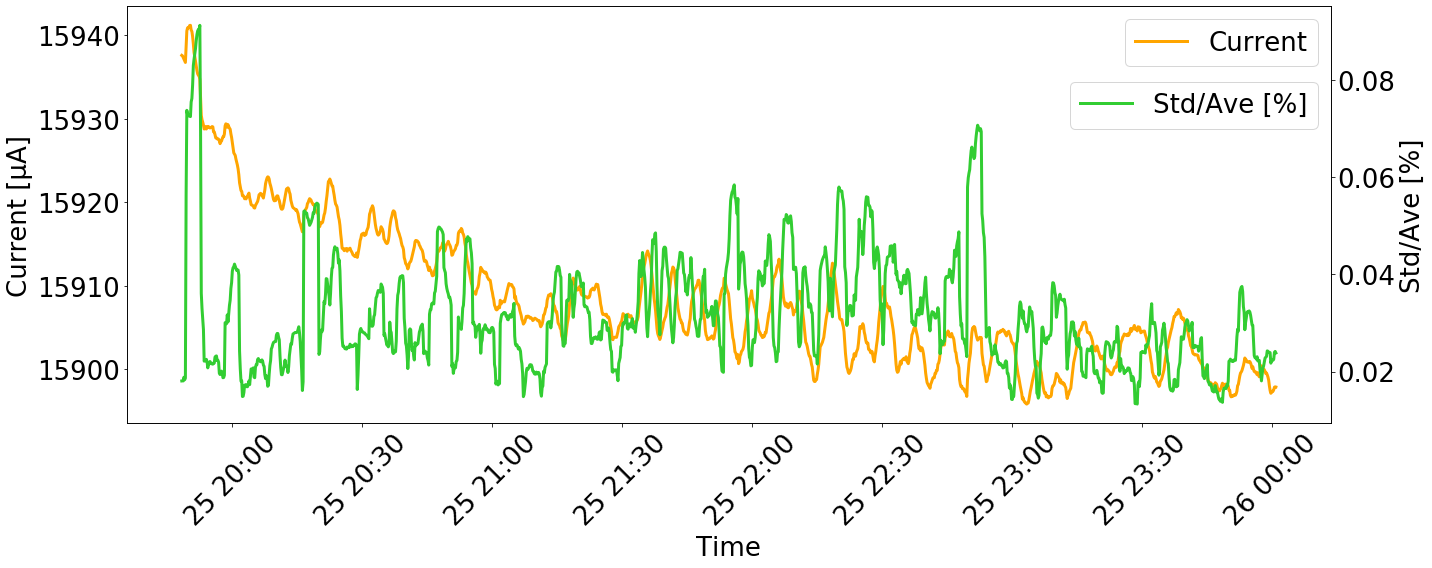

In [19]:
# create figure and axis objects with subplots()
fig2, ax20 = plt.subplots(figsize = (20,8))

# make a plot
ax20.plot( Current5kVAve['Time'], -Current5kVAve['Current'], label = 'Current', color = 'orange', lw = 3)
# set x-axis label
ax20.set_xlabel('Time', fontsize = 26)
ax20.tick_params(axis = 'x', labelrotation = 45, labelsize = 26)
# set y-axis label
ax20.set_ylabel('Current [µA]', fontsize = 26)
ax20.tick_params(axis = 'y', labelsize = 26)

ax21 = ax20.twinx()
ax21.plot( Current5kVAve['Time'], Current5kVAve['Variation'], label = 'Std/Ave [%]', color = 'limegreen', lw = 3 )
ax21.set_ylabel('Std/Ave [%]', fontsize = 26)
ax21.tick_params(axis = 'y', labelsize = 26)

ax20.legend(loc = 'upper right', ncol = 1, fontsize = 26)
ax21.legend(loc = 'upper right', bbox_to_anchor = (1, 0.85), ncol = 1, fontsize = 26)

plt.tight_layout()
plt.show()

# save the plot as a file
fig2.savefig('/Users/yuntse/Documents/DUNE/SLArchetto/Monitoring/CurrentAve_202206251945_5kV.png')